In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
x=df.iloc[50:,[0,3]].values
y=df.target[50:].values

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

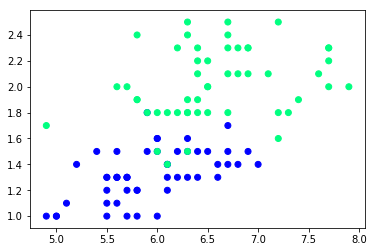

In [19]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [21]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='linear',probability=True)

In [22]:
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred=svc.predict(x_test)

In [24]:
y_pred

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [25]:
y_test

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [27]:
print(svc.score(x_train,y_train))
svc.score(x_test,y_test)

0.925


1.0

In [32]:
t0=x_test[0].reshape(1,-1) # reshape is used to 1D array into 2D

In [33]:
svc.predict_proba(t0)

array([[0.82682923, 0.17317077]])

In [31]:
x_test[0]

array([6.8, 1.4])

In [35]:
svc.decision_function(t0) # -ive indicate 2nd class 

array([-0.65442997])

In [37]:
svc.predict(t0)

array([1])

In [38]:
y_test[0]

1

In [43]:
svc.intercept_ #it define intercept ie.c/b

array([-6.99742378])

In [44]:
svc.coef_

array([[0.2159811 , 3.48165879]])

In [49]:
w=svc.coef_[0]
s=-(w[0]/w[1])

In [50]:
x1=np.linspace(4.0,8.0,100)
x2=s*x1+((-svc.intercept_)/w[1])

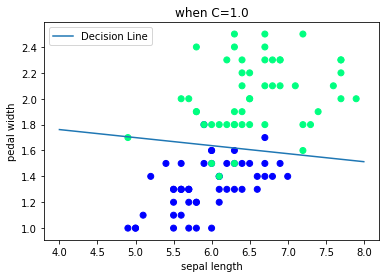

In [59]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
plt.plot(x1,x2,label='Decision Line')
plt.title(f'when C={1.0}')
plt.xlabel('sepal length')
plt.ylabel('pedal width')
plt.legend()
plt.show()

when C= 0.001
0.825
0.85


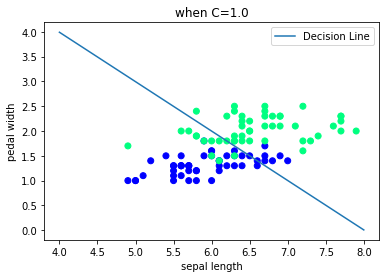

when C= 0.01
0.825
0.85


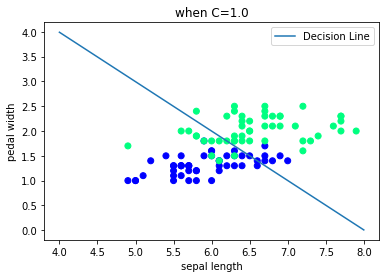

when C= 1
0.925
1.0


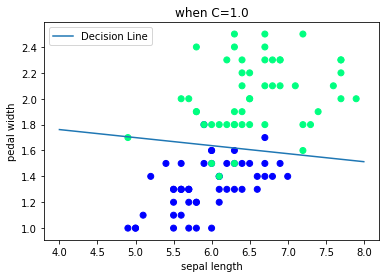

when C= 10
0.925
1.0


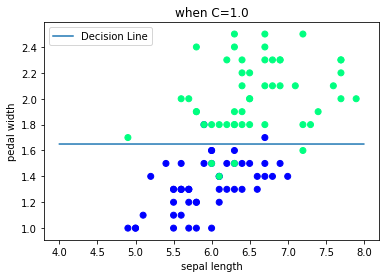

In [65]:
for i in [.001,.01,1,10]:
    svc=SVC(C=i,kernel='linear')
    svc.fit(x_train,y_train)
    print('when C=',i)
    print(svc.score(x_train,y_train))
    print(svc.score(x_test,y_test))
    w=svc.coef_[0]
    s=-(w[0]/w[1])
    x1=np.linspace(4.0,8.0,100)
    x2=s*x1+((-svc.intercept_)/w[1])
    plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
    plt.plot(x1,x2,label='Decision Line')
    plt.title(f'when C={1.0}')
    plt.xlabel('sepal length')
    plt.ylabel('pedal width')
    plt.legend()
    plt.show()